In [451]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

import folium
%matplotlib inline


In [340]:
! sklearn.__version__

/bin/sh: sklearn.__version__: command not found


In [341]:
TRI_14 = pd.read_csv("TRI_env_factors/TRI_2014_CA.csv")


In [342]:
#Clean air act chemicals are ones on this list: https://www.epa.gov/epcra/epcracerclacaa-ss112r-consolidated-list-lists-march-2015-version

In [343]:
# TRI_14[TRI_14['CLEAR_AIR_ACT_CHEMICAL']=='YES']

In [344]:
# TRI_14[[
# '5.4_UNDERGROUND',
# '5.4.1_UNDERGROUND_CLASS_I',
# '5.4.2_UNDERGROUND_CLASS_II-V',
# '5.5.1_LANDFILLS',
# '5.5.1A_RCRA_C_LANDFILLS',
# '5.5.1B_OTHER_LANDFILLS',
# '5.5.2_LAND_TREATMENT',
# '5.5.3_SURFACE_IMPOUNDMENT',
# '5.5.3A_RCRA_C_SURFACE_IMP.',
# '5.5.3B_Other_SURFACE_IMP.',
# '5.5.4_OTHER_DISPOSAL']]

In [345]:
TRI_14['METAL_CATEGORY'].nunique()
# TRI_14
# 'INDUSTRY_SECTOR_CODE'


5

In [346]:
ii = TRI_14.columns
for i in ii:  
    print i

YEAR
TRI_FACILITY_ID
FRS_ID
FACILITY_NAME
STREET_ADDRESS
CITY
COUNTY
ST
ZIP
BIA_CODE
TRIBE
LATITUDE
LONGITUDE
FEDERAL_FACILITY
INDUSTRY_SECTOR_CODE
INDUSTRY_SECTOR
PRIMARY_SIC
SIC_2
SIC_3
SIC_4
SIC_5
SIC_6
PRIMARY_NAICS
NAICS_2
NAICS_3
NAICS_4
NAICS_5
NAICS_6
DOC_CTRL_NUM
CHEMICAL
CAS_#/COMPOUND_ID
SRS_ID
CLEAR_AIR_ACT_CHEMICAL
CLASSIFICATION
METAL
METAL_CATEGORY
CARCINOGEN
FORM_TYPE
UNIT_OF_MEASURE
5.1_FUGITIVE_AIR
5.2_STACK_AIR
5.3_WATER
5.4_UNDERGROUND
5.4.1_UNDERGROUND_CLASS_I
5.4.2_UNDERGROUND_CLASS_II-V
5.5.1_LANDFILLS
5.5.1A_RCRA_C_LANDFILLS
5.5.1B_OTHER_LANDFILLS
5.5.2_LAND_TREATMENT
5.5.3_SURFACE_IMPOUNDMENT
5.5.3A_RCRA_C_SURFACE_IMP.
5.5.3B_Other_SURFACE_IMP.
5.5.4_OTHER_DISPOSAL
ON-SITE_RELEASE_TOTAL
6.1_POTW-TRANSFERS_FOR_RELEASE
6.1_POTW-TRANSFERS_FOR_TREATM.
6.1_POTW-TOTAL_TRANSFERS
6.2_M10
6.2_M41
6.2_M62
6.2_M71
6.2_M81
6.2_M82
6.2_M72
6.2_M63
6.2_M66
6.2_M67
6.2_M64
6.2_M65
6.2_M73
6.2_M79
6.2_M90
6.2_M94
6.2_M99
OFF-SITE_RELEASE_TOTAL
6.2_M20
6.2_M24
6.2_M26
6.2_M28
6

In [347]:

TRI_14_sm = TRI_14[['TRI_FACILITY_ID',
'COUNTY',
'LATITUDE',
'LONGITUDE', 
'CLEAR_AIR_ACT_CHEMICAL',
'PRIMARY_NAICS',
'METAL_CATEGORY',
'INDUSTRY_SECTOR_CODE',
'CLASSIFICATION',
'CHEMICAL',
'CARCINOGEN',
'UNIT_OF_MEASURE',
'5.1_FUGITIVE_AIR',
'5.2_STACK_AIR',
'5.3_WATER',
'ON-SITE_RELEASE_TOTAL', 
'OFF-SITE_RELEASE_TOTAL',
'OFF-SITE_RECYCLED_TOTAL',
'OFF-SITE_TREATED_TOTAL',
'OFF-SITE_RECOVERY_TOTAL',
'PROD._WASTE_(8.1_THRU_8.7)',
'TOTAL_RELEASES']]


In [348]:

TRI_14_sm.columns = ['TRI_FACILITY_ID',
'COUNTY',
'LATITUDE',
'LONGITUDE', 
'CLEAR_AIR_ACT_CHEMICAL',
'PRIMARY_NAICS',
'METAL_CATEGORY',
'INDUSTRY_SECTOR_CODE',
'CLASSIFICATION',
'CHEMICAL',
'CARCINOGEN',
'UNIT_OF_MEASURE',
'5.1_FUGITIVE_AIR',
'5.2_STACK_AIR',
'5.3_WATER',
'ON-SITE_RELEASE_TOTAL', 
'OFF-SITE_RELEASE_TOTAL',
'OFF-SITE_RECYCLED_TOTAL',
'OFF-SITE_TREATED_TOTAL',
'OFF-SITE_RECOVERY_TOTAL',
'PROD._WASTE_(8.1_THRU_8.7)',
'TOTAL_RELEASES']

In [450]:
TRI_14_sm.head()

,TRI_FACILITY_ID,COUNTY,LATITUDE,LONGITUDE,CLEAR_AIR_ACT_CHEMICAL,PRIMARY_NAICS,METAL_CATEGORY,INDUSTRY_SECTOR_CODE,CLASSIFICATION,CHEMICAL,...,5.3_WATER,ON-SITE_RELEASE_TOTAL,OFF-SITE_RELEASE_TOTAL,OFF-SITE_RECYCLED_TOTAL,OFF-SITE_TREATED_TOTAL,OFF-SITE_RECOVERY_TOTAL,PROD._WASTE_(8.1_THRU_8.7),TOTAL_RELEASES,County,2014
0,91739SLPRL12281,san bernardino,34.099080,-117.536523,0,325193,0,325,TRI,NITRATE COMPOUNDS,...,0.00,0.0000,0.0,0.00,16457.00,0.0,16457.0000,0.0000,san bernardino,138.166667
1,90810CRSNT2365E,los angeles,33.805420,-118.225650,0,424710,0,4247,TRI,"1,2,4-TRIMETHYLBENZENE",...,8.08,207.4800,0.0,10.48,0.21,0.0,218.1600,207.4800,los angeles,138.250000
2,90810CRSNT2365E,los angeles,33.805420,-118.225650,1,424710,0,4247,TRI,PHENANTHRENE,...,0.00,0.4610,0.0,0.00,0.00,0.0,0.4610,0.4610,los angeles,138.250000
4,90280GRDNF5611E,los angeles,33.931251,-118.172539,0,311513,0,311,TRI,NITRIC ACID,...,0.00,0.0000,0.0,0.00,0.00,0.0,88749.0000,0.0000,los angeles,138.250000
5,94566TLTYV3786V,alameda,37.674740,-121.862060,1,327390,1,327,PBT,LEAD,...,0.00,0.0016,0.0,0.00,0.00,0.0,0.0016,0.0016,alameda,79.750000


This was an original export for some vizzes.

In [350]:
# county_tox_tots = TRI_14_sm.groupby(["COUNTY",'CHEMICAL','UNIT_OF_MEASURE' ], as_index = False).sum()

In [351]:
# county_tox_tots.to_csv("county_tox_tots.csv")

In [352]:
# facility_tox_tots = TRI_14_sm.groupby(["TRI_FACILITY_ID","LATITUDE",'LONGITUDE' ], as_index = False)['TOTAL_RELEASES'].sum()

In [353]:
# facility_tox_tots.to_csv("facility_tox_tots.csv")

In [354]:
# with open('2013_county_vars.pkl', 'w') as picklefile:
#     pickle.dump(rmean_2013, picklefile)

This is loading in the county distributions from 2013,2014,2015.

In [355]:
with open('2013_county_vars.pkl', 'r') as picklefile:
    cnty_2013 = pickle.load(picklefile)

In [356]:
with open('2014_county_vars.pkl', 'r') as picklefile:
    cnty_2014 = pickle.load(picklefile)

In [357]:
with open('2015_county_vars.pkl', 'r') as picklefile:
    cnty_2015 = pickle.load(picklefile)

In [358]:
with open('all_ctys_dict.pkl', 'r') as picklefile:
    all_ctys_dict = pickle.load(picklefile)

In [359]:
with open('county_name_list.pkl', 'r') as picklefile:
    all_CA_county_list = pickle.load(picklefile)

In [360]:


with open('county_year_vals.pkl', 'r') as picklefile:
    all_cty_yr_dict = pickle.load(picklefile)

In [445]:
TRI_14_sm.head(2)

,TRI_FACILITY_ID,COUNTY,LATITUDE,LONGITUDE,CLEAR_AIR_ACT_CHEMICAL,PRIMARY_NAICS,METAL_CATEGORY,INDUSTRY_SECTOR_CODE,CLASSIFICATION,CHEMICAL,...,5.3_WATER,ON-SITE_RELEASE_TOTAL,OFF-SITE_RELEASE_TOTAL,OFF-SITE_RECYCLED_TOTAL,OFF-SITE_TREATED_TOTAL,OFF-SITE_RECOVERY_TOTAL,PROD._WASTE_(8.1_THRU_8.7),TOTAL_RELEASES,County,2014
0,91739SLPRL12281,san bernardino,34.09908,-117.536523,0,325193,0,325,TRI,NITRATE COMPOUNDS,...,0.00,0.00,0.0,0.00,16457.00,0.0,16457.00,0.00,san bernardino,138.166667
1,90810CRSNT2365E,los angeles,33.80542,-118.225650,0,424710,0,4247,TRI,"1,2,4-TRIMETHYLBENZENE",...,8.08,207.48,0.0,10.48,0.21,0.0,218.16,207.48,los angeles,138.250000


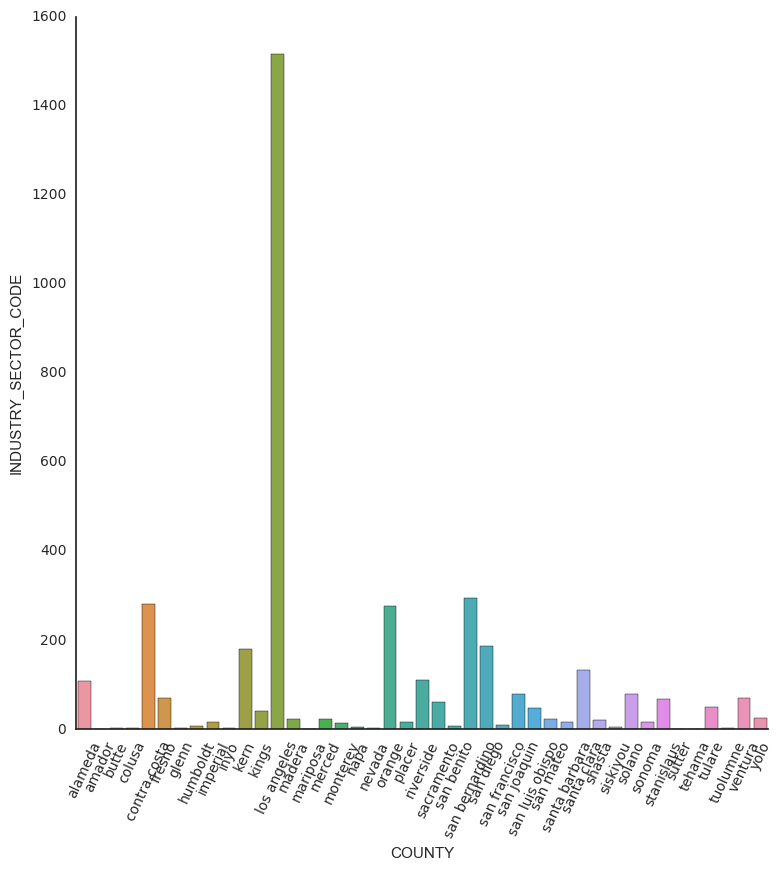

In [470]:
plt.rcParams['figure.figsize']=(10,10)
sns.set(style="white")
sns.factorplot(x = 'COUNTY', 
               y ='INDUSTRY_SECTOR_CODE', 
               data = TRI_14_sm.groupby(['COUNTY'], as_index=False)['INDUSTRY_SECTOR_CODE'].count(), 
               size = 8,
               kind = 'bar' ,
#                orient= 'h'
              ).set_xticklabels(rotation=65)


# g = sns.factorplot(x='sample'
#                    ,y= 'value'
#                    ,hue='GEN'
#                    ,data=data
#                    ,kind='bar'
#                    ,aspect=2
#                    )
# g;

In [438]:
# TRI_14_sm.groupby([ 'COUNTY','INDUSTRY_SECTOR_CODE', 'PRIMARY_NAICS' ])[2014].sum().hist()

In [362]:
le = LabelEncoder()

In [363]:
TRI_14_sm['CLEAR_AIR_ACT_CHEMICAL'] = le.fit_transform(TRI_14_sm['CLEAR_AIR_ACT_CHEMICAL'])
TRI_14_sm['CARCINOGEN'] = le.fit_transform(TRI_14_sm['CARCINOGEN'])
TRI_14_sm['UNIT_OF_MEASURE'] = le.fit_transform(TRI_14_sm['UNIT_OF_MEASURE'])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

In [364]:
TRI_14_sm.head()
TRI_14_sm['COUNTY'] = TRI_14_sm['COUNTY'].apply(lambda x: x.lower())

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [365]:
cty_yr_df = pd.DataFrame(all_cty_yr_dict).T
cty_yr_df = cty_yr_df.reset_index()
cty_yr_df.columns = ['County', 2013, 2014, 2015]
cty_yr_df = cty_yr_df.dropna()
cty_yr_df['County'] = cty_yr_df['County'].apply(lambda x: x.lower())

In [366]:
TRI_14_sm = TRI_14_sm.merge(cty_yr_df[['County', 2014]],how = 'left', left_on ='COUNTY', right_on = "County" )

In [367]:
TRI_14_sm = TRI_14_sm[~np.isnan(TRI_14_sm[2014])]

In [368]:
TRI_14_sm.head()

,TRI_FACILITY_ID,COUNTY,LATITUDE,LONGITUDE,CLEAR_AIR_ACT_CHEMICAL,PRIMARY_NAICS,METAL_CATEGORY,INDUSTRY_SECTOR_CODE,CLASSIFICATION,CHEMICAL,...,5.3_WATER,ON-SITE_RELEASE_TOTAL,OFF-SITE_RELEASE_TOTAL,OFF-SITE_RECYCLED_TOTAL,OFF-SITE_TREATED_TOTAL,OFF-SITE_RECOVERY_TOTAL,PROD._WASTE_(8.1_THRU_8.7),TOTAL_RELEASES,County,2014
0,91739SLPRL12281,san bernardino,34.099080,-117.536523,0,325193,0,325,TRI,NITRATE COMPOUNDS,...,0.00,0.0000,0.0,0.00,16457.00,0.0,16457.0000,0.0000,san bernardino,138.166667
1,90810CRSNT2365E,los angeles,33.805420,-118.225650,0,424710,0,4247,TRI,"1,2,4-TRIMETHYLBENZENE",...,8.08,207.4800,0.0,10.48,0.21,0.0,218.1600,207.4800,los angeles,138.250000
2,90810CRSNT2365E,los angeles,33.805420,-118.225650,1,424710,0,4247,TRI,PHENANTHRENE,...,0.00,0.4610,0.0,0.00,0.00,0.0,0.4610,0.4610,los angeles,138.250000
4,90280GRDNF5611E,los angeles,33.931251,-118.172539,0,311513,0,311,TRI,NITRIC ACID,...,0.00,0.0000,0.0,0.00,0.00,0.0,88749.0000,0.0000,los angeles,138.250000
5,94566TLTYV3786V,alameda,37.674740,-121.862060,1,327390,1,327,PBT,LEAD,...,0.00,0.0016,0.0,0.00,0.00,0.0,0.0016,0.0016,alameda,79.750000


In [369]:
map_osm = folium.Map(location=[33.813230, -118.242980],
                    zoom_start=6)
map_osm

In [370]:
map_2 = folium.Map(location=[45.5236, -122.6750],
                   tiles= 'Stamen Terrain',
                   zoom_start=13)
folium.Marker([45.5244, -122.6699],
              popup='The Waterfront'
             ).add_to(map_2)
folium.CircleMarker([45.5215, -122.6261],
                    radius=500,
                    popup='Laurelhurst Park',
                    color='#3186cc',
                    fill_color='#3186cc',
                   ).add_to(map_2)
map_2

In [403]:
lr_outputs = LogisticRegression(penalty='l1')

In [419]:
# X_outputs = TRI_14_sm[[ u'CARCINOGEN', 'CLEAR_AIR_ACT_CHEMICAL', 'CLASSIFICATION', 'METAL_CATEGORY', 'INDUSTRY_SECTOR_CODE']]
X_outputs = TRI_14_sm[[  'PRIMARY_NAICS']]
X_outputs[ 'PRIMARY_NAICS'] = X_outputs[ 'PRIMARY_NAICS'].astype('category')
X_outputs = pd.get_dummies(X_outputs)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [420]:
X_outputs.head(2)

,PRIMARY_NAICS_112120,PRIMARY_NAICS_212221,PRIMARY_NAICS_212299,PRIMARY_NAICS_212319,PRIMARY_NAICS_221112,PRIMARY_NAICS_311111,PRIMARY_NAICS_311119,PRIMARY_NAICS_311212,PRIMARY_NAICS_311221,PRIMARY_NAICS_311224,...,PRIMARY_NAICS_561910,PRIMARY_NAICS_562112,PRIMARY_NAICS_562211,PRIMARY_NAICS_562213,PRIMARY_NAICS_611513,PRIMARY_NAICS_922120,PRIMARY_NAICS_922140,PRIMARY_NAICS_924120,PRIMARY_NAICS_927110,PRIMARY_NAICS_928110
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [421]:
y = TRI_14_sm[2014].apply(lambda x:  1 if x>100  else  0)

In [407]:
cross_val_score(lr_outputs,X_outputs, y, cv =10 )

array([ 0.71979434,  0.69151671,  0.73521851,  0.70179949,  0.68380463,
        0.6966581 ,  0.71208226,  0.69845361,  0.66149871,  0.7751938 ])

HERE'S A VERSION with 200 columns....

In [110]:
X_big = pd.get_dummies(TRI_14_sm[[ u'CLASSIFICATION', u'CHEMICAL',
       u'CARCINOGEN', u'UNIT_OF_MEASURE','CLEAR_AIR_ACT_CHEMICAL','5.1_FUGITIVE_AIR','5.2_STACK_AIR','5.3_WATER', u'ON-SITE_RELEASE_TOTAL',
       u'OFF-SITE_RELEASE_TOTAL', u'OFF-SITE_RECYCLED_TOTAL',
       u'OFF-SITE_TREATED_TOTAL', u'OFF-SITE_RECOVERY_TOTAL', u'PROD_WASTE_', u'TOTAL_RELEASES']])

In [111]:
X_big.shape


(3885, 199)

In [ ]:
y = TRI_14_sm[2014].apply(lambda x:  1 if x>100  else  0)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_big, y, test_size=0.33, random_state=42)

In [100]:
lr = LogisticRegression(penalty='l1')

lr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
zipped = zip(X_train.columns, lr.coef_[0] )


short_zipped = sorted([i for i in zipped], key=lambda x: x[1], reverse = True)[:30]
short_zipped

[('CHEMICAL_PERACETIC ACID', 1.4579634536016732),
 ('CHEMICAL_ZINC (FUME OR DUST)', 0.9928432791038434),
 ('CHEMICAL_DIMETHYL PHTHALATE', 0.83963004722315082),
 ('CHEMICAL_PHTHALIC ANHYDRIDE', 0.83856864171775602),
 ('CHEMICAL_BENZENE', 0.55320876087370208),
 ('CHEMICAL_ETHYLBENZENE', 0.5373852915987144),
 ('CHEMICAL_N-BUTYL ALCOHOL', 0.48576234900030718),
 ('CHEMICAL_NAPHTHALENE', 0.46159050925803524),
 ('CHEMICAL_XYLENE (MIXED ISOMERS)', 0.41582458197359506),
 ('CHEMICAL_METHYL ISOBUTYL KETONE', 0.3384587980799007),
 ('CHEMICAL_MALEIC ANHYDRIDE', 0.32791670437603115),
 ('CHEMICAL_TOLUENE', 0.31846072224388761),
 ('CHEMICAL_1,2,4-TRIMETHYLBENZENE', 0.31214182584019734),
 ('CHEMICAL_CYCLOHEXANE', 0.26828239237730345),
 ('CHEMICAL_MERCURY COMPOUNDS', 0.24507142227869622),
 ('CLASSIFICATION_TRI', 0.22213817708232955),
 ('CHEMICAL_PHENANTHRENE', 0.1451475215487345),
 ('CHEMICAL_CUMENE', 0.14335835089477739),
 ('CLEAR_AIR_ACT_CHEMICAL', 0.13661995489099532),
 ('UNIT_OF_MEASURE', 0.10723097

In [101]:
cross_val_score(lr,X_big, y, cv =5 )

array([ 0.6529563 ,  0.64138817,  0.65765766,  0.6507732 ,  0.64690722])

These are all scoring in the same range, let's use a NON-PARAMETRIC model instead to see if we can do a better job. 

In [301]:
clf = RandomForestClassifier()


In [300]:
# dir(rfs_gs.best_estimator_ )
# rfs_gs.best_estimator_.feature_importances_

In [422]:
rfc_params = {
    'n_estimators':[250, 350], 
#     'criterion':'gini', 
#     'max_depth': None,
    'min_samples_split': [2,6,8,12],
#     'min_samples_leaf':1, 'min_weight_fraction_leaf':0.0, 
     'max_features':['log2', 'auto'], 
#     'max_leaf_nodes':None, 
#     'min_impurity_split':1e-07, 'bootstrap':True, 'oob_score':False, 
#     'n_jobs':1,  'class_weight': None
    
}

rfs_gs = GridSearchCV(clf, rfc_params, cv=5, verbose=1)
rfs_gs.fit(X_outputs, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:  2.4min
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [250, 350], 'min_samples_split': [2, 6, 8, 12], 'max_features': ['log2', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [423]:
rfs_gs.best_score_

0.71531531531531534

In [424]:
print rfs_gs.best_params_

{'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 350}


In [425]:
# rfs_gs.best_estimator_.feature_importances_

In [426]:
X_outputs.columns

Index([u'PRIMARY_NAICS_112120', u'PRIMARY_NAICS_212221',
       u'PRIMARY_NAICS_212299', u'PRIMARY_NAICS_212319',
       u'PRIMARY_NAICS_221112', u'PRIMARY_NAICS_311111',
       u'PRIMARY_NAICS_311119', u'PRIMARY_NAICS_311212',
       u'PRIMARY_NAICS_311221', u'PRIMARY_NAICS_311224',
       ...
       u'PRIMARY_NAICS_561910', u'PRIMARY_NAICS_562112',
       u'PRIMARY_NAICS_562211', u'PRIMARY_NAICS_562213',
       u'PRIMARY_NAICS_611513', u'PRIMARY_NAICS_922120',
       u'PRIMARY_NAICS_922140', u'PRIMARY_NAICS_924120',
       u'PRIMARY_NAICS_927110', u'PRIMARY_NAICS_928110'],
      dtype='object', length=229)

In [427]:


zip3 = zip(rfs_gs.best_estimator_.feature_importances_, X_outputs.columns)

short_zip3 = sorted([i for i in zip3], key=lambda x: x[0], reverse = True)
short_zip3[:10]

[(0.08312018812566406, 'PRIMARY_NAICS_541712'),
 (0.059143780561329018, 'PRIMARY_NAICS_334412'),
 (0.043727883144056442, 'PRIMARY_NAICS_334413'),
 (0.03122747910411626, 'PRIMARY_NAICS_334419'),
 (0.026835835424301711, 'PRIMARY_NAICS_424710'),
 (0.022612727990416134, 'PRIMARY_NAICS_332911'),
 (0.022110045289997431, 'PRIMARY_NAICS_321113'),
 (0.020555001223820278, 'PRIMARY_NAICS_334418'),
 (0.016616601734953561, 'PRIMARY_NAICS_336111'),
 (0.016325814026026217, 'PRIMARY_NAICS_332119')]

In [302]:
X_chem_sect = pd.get_dummies(TRI_14_sm[[ 'INDUSTRY_SECTOR_CODE', u'CHEMICAL']])

In [304]:
X_chem_sect.head(3)

,INDUSTRY_SECTOR_CODE,"CHEMICAL_1,1,2-TRICHLOROETHANE","CHEMICAL_1,2,4-TRIMETHYLBENZENE","CHEMICAL_1,2-BUTYLENE OXIDE","CHEMICAL_1,2-DIBROMOETHANE","CHEMICAL_1,2-DICHLOROETHYLENE","CHEMICAL_1,3-BUTADIENE","CHEMICAL_1,3-DICHLOROPROPYLENE","CHEMICAL_1,3-PHENYLENEDIAMINE","CHEMICAL_1,4-DIOXANE",...,CHEMICAL_TOXAPHENE,"CHEMICAL_TRANS-1,3-DICHLOROPROPENE",CHEMICAL_TRICHLOROETHYLENE,CHEMICAL_TRIETHYLAMINE,CHEMICAL_VANADIUM (EXCEPT WHEN CONTAINED IN AN ALLOY),CHEMICAL_VANADIUM COMPOUNDS,CHEMICAL_VINYL ACETATE,CHEMICAL_XYLENE (MIXED ISOMERS),CHEMICAL_ZINC (FUME OR DUST),CHEMICAL_ZINC COMPOUNDS
0,325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4247,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [305]:
rfc_params = {
    'n_estimators':[100,250], 
#     'criterion':'gini', 
#     'max_depth': None,
    'min_samples_split': [2,6,8,12],
#     'min_samples_leaf':1, 'min_weight_fraction_leaf':0.0, 
     'max_features':['log2', 'auto'], 
#     'max_leaf_nodes':None, 
#     'min_impurity_split':1e-07, 'bootstrap':True, 'oob_score':False, 
#     'n_jobs':1,  'class_weight': None
    
}

rfs_gs = GridSearchCV(clf, rfc_params, cv=5, verbose=1)
rfs_gs.fit(X_chem_sect, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 250], 'min_samples_split': [2, 6, 8, 12], 'max_features': ['log2', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [306]:
rfs_gs.best_score_

0.65740025740025743

In [307]:
print rfs_gs.best_estimator_ 
print rfs_gs.best_params_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
{'max_features': 'log2', 'min_samples_split': 6, 'n_estimators': 100}


In [324]:
zip1 = zip(rfs_gs.best_estimator_.feature_importances_, X_chem_sect.columns)

short_zip1 = sorted([i for i in zip1], key=lambda x: x[0], reverse = True)[:30]
short_zip1[:5]



[(0.51727886826754088, 'INDUSTRY_SECTOR_CODE'),
 (0.010004842979887765,
  'CHEMICAL_SULFURIC ACID (1994 AND AFTER ACID AEROSOLS" ONLY)"'),
 (0.0079668228731973427, 'CHEMICAL_NITRATE COMPOUNDS'),
 (0.0073408844369849176, 'CHEMICAL_N-METHYL-2-PYRROLIDONE'),
 (0.0071159389198626952, 'CHEMICAL_TOLUENE')]

In [319]:
X_sectors = TRI_14_sm[  'INDUSTRY_SECTOR_CODE'].astype('category')
X_sectors = pd.get_dummies(X_sectors)


In [317]:
rfc_params = {
    'n_estimators':[100,250], 
#     'criterion':'gini', 
#     'max_depth': None,
    'min_samples_split': [2,6,8,12],
#     'min_samples_leaf':1, 'min_weight_fraction_leaf':0.0, 
     'max_features':['log2', 'auto'], 
#     'max_leaf_nodes':None, 
#     'min_impurity_split':1e-07, 'bootstrap':True, 'oob_score':False, 
#     'n_jobs':1,  'class_weight': None
    
}

rfs_aa = GridSearchCV(clf, rfc_params, cv=5, verbose=1)
rfs_aa.fit(X_sectors, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   32.7s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   56.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 250], 'min_samples_split': [2, 6, 8, 12], 'max_features': ['log2', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [318]:
rfs_aa.best_score_

0.6782496782496783

In [321]:
print rfs_aa.best_estimator_ 
print rfs_aa.best_params_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
{'max_features': 'log2', 'min_samples_split': 6, 'n_estimators': 100}


In [325]:
zip2 = zip(rfs_aa.best_estimator_.feature_importances_, X_sectors.columns)

short_zip2 = sorted([i for i in zip2], key=lambda x: x[0], reverse = True)[:30]
short_zip2[:10]


[(0.35742485979198413, 334),
 (0.12171204512288032, 4247),
 (0.069451496598039869, 562),
 (0.069412948349078685, 321),
 (0.063532729924133238, 4246),
 (0.046573667509247671, 322),
 (0.045527089518005874, 311),
 (0.039919604447944936, 331),
 (0.025439154289250459, 999),
 (0.022713953201663407, 327)]

In [ ]:
## 334 is Computer and Electronic
## 4247 Petroleum and Petroleum Products Merchant Wholesalers
## 562 Hazardous Waste


In [ ]:
## THIS SECTION needs some sweet vizzes. Like, explicitly, to go through the industry column, understand the 
## distribs there, and feat engineer what's going on for related industries
## also then a map of CA where i could thumb through the different, but like industries. 

In [ ]:
# mask = np.zeros_like(ca_solar_df_num_corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# fig, ax = plt.subplots(figsize=(8,7))
# ax = sns.heatmap(ca_solar_df_num_corr, mask=mask)

# ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
# ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

# plt.show()

In [43]:
# sns.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r'})
# plt.xlim(-10,310) 
# plt.ylim(ymin=0);

In [47]:

knn_params = {
    'n_neighbors':range(1,5),
    'weights':['distance','uniform']
}

knn_gs = GridSearchCV(KNeighborsClassifier(), knn_params, cv=10, verbose=1)
knn_gs.fit(X_big, y)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    9.5s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4], 'weights': ['distance', 'uniform']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [48]:
knn_best = knn_gs.best_estimator_
print knn_gs.best_params_
print knn_gs.best_score_

{'n_neighbors': 3, 'weights': 'uniform'}
0.60102960103


In [ ]:

knn_params = {
    'n_neighbors':range(1,5),
    'weights':['distance','uniform']
}

knn_gs = GridSearchCV(KNeighborsClassifier(), knn_params, cv=10, verbose=1)
knn_gs.fit(X_big, y)

In [ ]:
from sklearn.svm import SVC
#  'kernel':['linear','rbf']
# 'C':np.logspace(1e-4, 1e1, 3)

svc_params = {
    'C':np.logspace(1e-4, 1e1, 3),
    'kernel':['linear']
}

svc_gs = GridSearchCV(SVC(), svc_params, cv=2, verbose=1)
svc_gs.fit(X_big, y)

In [74]:
import xgboost as xgb
# from xgboost.sklearn import XGBClassifier
from sklearn.cross_validation import train_test_split

In [78]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth": 3, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

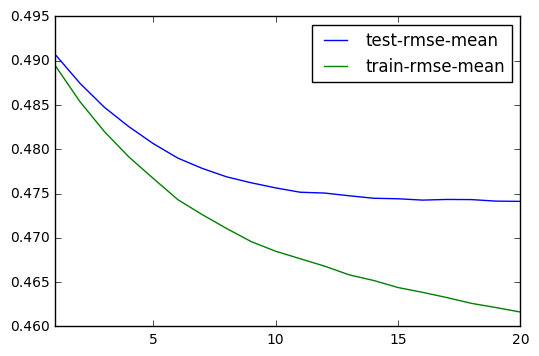

In [79]:

model.loc[1:,["test-rmse-mean", "train-rmse-mean"]].plot()

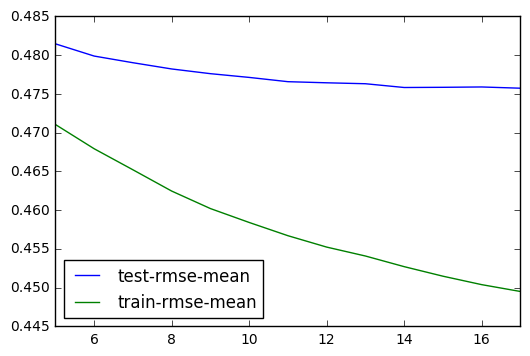

In [80]:
params = {"max_depth": 5, "eta":.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)
model.loc[5:,["test-rmse-mean", "train-rmse-mean"]].plot()

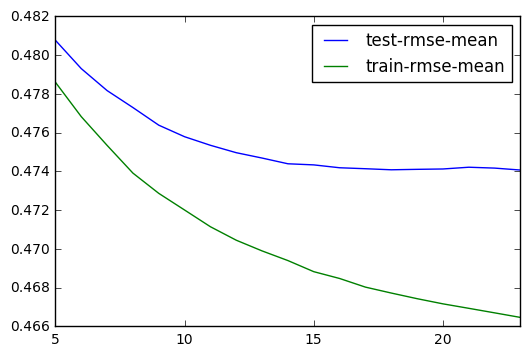

In [81]:
params = {"max_depth": 2, "eta":.1}
model = xgb.cv(params, dtrain,  num_boost_round=700, early_stopping_rounds=100)
model.loc[5:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [82]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=5, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

XGBoostError: [13:49:54] src/objective/regression_obj.cc:90: Check failed: (preds.size()) == (info.labels.size()) labels are not correctly providedpreds.size=2602, label.size=3885

In [ ]:
xgb_preds = np.expm1(model_xgb.predict(X_test))

In [ ]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":xgb_preds})